In [2]:
import kagglehub
path = kagglehub.dataset_download("forrestcarlton1/stress-levels-dataset")
filename = path + "/Stress_levels_dataset.csv"
print("Path to dataset files:", path)


100%|██████████| 3.15k/3.15k [00:00<00:00, 1.54MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/forrestcarlton1/stress-levels-dataset/versions/1


In [3]:


import pandas as pd

df = pd.read_csv(filename)
print(df.head()) # Display the first few rows
print(df.info())  # Get information about the data types and missing values
print(df.describe()) # Summary statistics for numerical columns






   Hours_of_Exercise_per_Week  Hours_of_Sleep_per_Night  Stress_Level
0                   12.971128                 16.640634     66.080715
1                   18.690657                  8.611546     57.429646
2                   29.379982                 21.197241     21.896920
3                   13.641095                 12.445706     60.982413
4                   18.542640                 10.816367     59.698328
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_of_Exercise_per_Week  100 non-null    float64
 1   Hours_of_Sleep_per_Night    100 non-null    float64
 2   Stress_Level                100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB
None
       Hours_of_Exercise_per_Week  Hours_of_Sleep_per_Night  Stress_Level
count                  100.000000                100.000000    100.000000

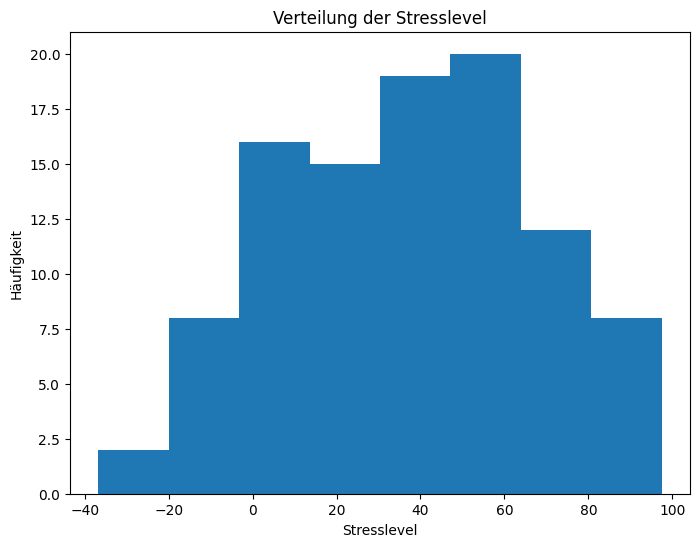

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['Stress_Level'].hist(bins=8, grid=False)
plt.title('Verteilung der Stresslevel')
plt.xlabel('Stresslevel')
plt.ylabel('Häufigkeit')
plt.show()


In [8]:

import math

def euclidean_distance(point1, point2):
  """Calculates the Euclidean distance between two points."""
  return math.sqrt(sum((x - y) ** 2 for x, y in zip(point1, point2)))

def region_query(data, point, eps):
  """Finds all points within a radius eps of the given point."""
  neighbors = []
  for i, other_point in enumerate(data):
    if euclidean_distance(point, other_point) <= eps and point != other_point:
      neighbors.append(i)
  return neighbors


def dbscan(data, eps, min_pts):
    labels = [-1] * len(data)  # Initialize all points as noise
    cluster_id = 0

    for i, point in enumerate(data):
        if labels[i] != -1:  # Skip already assigned points
            continue

        neighbors = region_query(data, point, eps)
        if len(neighbors) < min_pts:
            continue  # Point is noise

        cluster_id += 1
        labels[i] = cluster_id
        seed_set = neighbors.copy()

        while seed_set:
            current_point_index = seed_set.pop(0)
            if labels[current_point_index] == -1:
                labels[current_point_index] = cluster_id
            elif labels[current_point_index] == 0: #In case of border points already marked as 0
                labels[current_point_index] = cluster_id
            else:
                continue  # Already part of a cluster

            current_point_neighbors = region_query(data, data[current_point_index], eps)

            if len(current_point_neighbors) >= min_pts:
                seed_set.extend([n for n in current_point_neighbors if n not in seed_set])
    return labels

#selected_columns = ['Hours_of_Sleep_per_Night', 'Stress_Level']
selected_columns = ['Hours_of_Exercise_per_Week', 'Stress_Level']
data = df[selected_columns].values.tolist()

eps = 6.5
min_pts = 4
labels = dbscan(data, eps, min_pts)
print("Cluster Labels:", labels)


Cluster Labels: [1, 1, 1, 1, 1, 1, 1, -1, 2, 3, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, -1, 1, 2, 1, 1, 2, 2, 1, -1, 1, 1, 1, 1, 2, 3, 2, 1, 1, -1, 1, 1, 2, 3, 2, 2, 1, 1, 1, 1, 3, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]


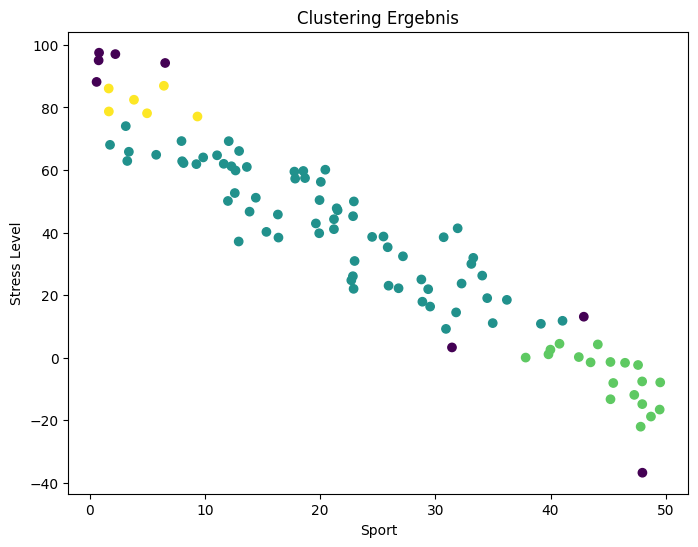

In [10]:

import matplotlib.pyplot as plt

x_coords = [point[0] for point in data]
y_coords = [point[1] for point in data]

plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, c=labels, cmap='viridis')
plt.title('Clustering Ergebnis')
plt.xlabel('Sport')
plt.ylabel('Stress Level')
plt.show()


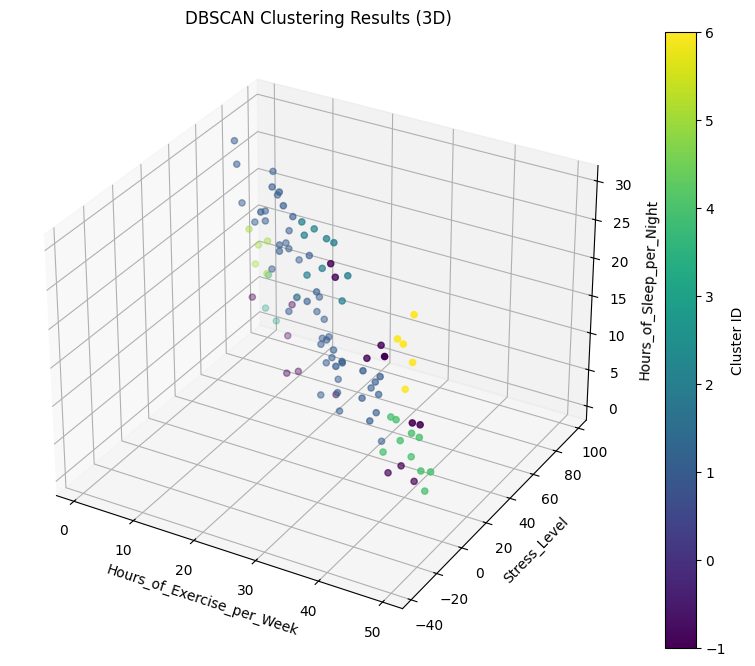

In [12]:
# Nun in 3D
selected_columns = ['Hours_of_Exercise_per_Week', 'Stress_Level', 'Hours_of_Sleep_per_Night']
data = df[selected_columns].values.tolist()

eps = 8
min_pts = 3
labels = dbscan(data, eps, min_pts)

# Prepare data for plotting
x_coords = [point[0] for point in data]
y_coords = [point[1] for point in data]
z_coords = [point[2] for point in data]

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_coords, y_coords, z_coords, c=labels, cmap='viridis')

ax.set_xlabel(selected_columns[0])
ax.set_ylabel(selected_columns[1])
ax.set_zlabel(selected_columns[2])
ax.set_title('DBSCAN Clustering Results (3D)')
plt.colorbar(scatter, label='Cluster ID')